# Sewage Alertrs Analysis

# 1. Deside Top 100 significant alarms

 Data Set Characteristics:
 
    :Data contains alert data gathered by remote EDM loggers. The data spans a number of months and includes periods of both wet and dry weather.

    :EDMs (Event Detection Systems) will offer real-time notification alerts and provide information on the performance of CSO (Combined Sewer Overflow) by verifying the timing and duration of spill operations. The alarms will be prominently displayed in the Control Room, enabling Operations staff to promptly respond, identify the cause of the spill, and take appropriate actions.

    :However, the alerts do not necessarily result in Control Room alarms. Nonetheless, the number of alerts serves as an indication of both current and past performance.

    :The installation process is adding new loggers every day. With this comes an increase in the number of alerts being generated at these EDM sites. 

    :High priority alerts are generally those that relate to events or levels within the overflow structure.
    :Low priority alerts (column B) are generally related to communication of the remote monitoring device.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re 

In [2]:
df = pd.read_excel("Data2022.xlsx", parse_dates=[['Date', 'Time']])
df = df.reset_index(drop=True)
df

,Date_Time,Priority,Site ID,Site Name,Description
0,2018-05-31 23:06:33,HIGH,19786,MILL LANE CORSTON (19786),Normal -> LOW Profile (1814.50mm)
1,2018-05-31 22:56:37,HIGH,16561,FRA. COT. WBOURNE FIELD OFF,LOW (301.29mm)
2,2018-05-31 22:41:24,HIGH,16561,FRA. COT. WBOURNE FIELD OFF,Normal -> LOW Profile (332.15mm)
3,2018-05-31 22:08:29,HIGH,17514,BATH(N)-R/O 125 SOUTHLANDS,LOW (249.61mm)
4,2018-05-31 22:08:29,HIGH,17514,BATH(N)-R/O 125 SOUTHLANDS,LOW (249.61mm)
...,...,...,...,...,...
58826,2017-06-05 12:17:41,HIGH,16511,FROME - CARPET FACTORY (16511,LOW (135.00mm)
58827,2017-06-05 12:13:51,HIGH,16511,FROME - CARPET FACTORY (16511,HIGH (861.00mm)
58828,2017-06-05 10:19:46,HIGH,16513,FROME - RODDEN ROAD (16513),LOW (393.00mm)
58829,2017-06-05 10:17:06,HIGH,16513,FROME - RODDEN ROAD (16513),HIGH (929.00mm)


1. Only considered "High" Priority. And omitted same time and place alerts because they alerted the same observation.

In [3]:
df = df[df["Priority"]=="HIGH"]
df = df.drop_duplicates(["Site ID", "Date_Time"])

2. About "Description" column, only considered the words ("High", "Low", and "Normal").

In [4]:
for i, data in df.iterrows():
  if "Normal -> HIGH" in data["Description"]:
    df.loc[i,"Description_order"]=1
  elif "Normal -> LOW" in data["Description"]:
    df.loc[i,"Description_order"]=2
  elif "HIGH" in data["Description"]:
    df.loc[i,"Description_order"]=0
  elif "LOW" in data["Description"]:
    df.loc[i,"Description_order"]=3
df

,Date_Time,Priority,Site ID,Site Name,Description,Description_order
0,2018-05-31 23:06:33,HIGH,19786,MILL LANE CORSTON (19786),Normal -> LOW Profile (1814.50mm),2.0
1,2018-05-31 22:56:37,HIGH,16561,FRA. COT. WBOURNE FIELD OFF,LOW (301.29mm),3.0
2,2018-05-31 22:41:24,HIGH,16561,FRA. COT. WBOURNE FIELD OFF,Normal -> LOW Profile (332.15mm),2.0
3,2018-05-31 22:08:29,HIGH,17514,BATH(N)-R/O 125 SOUTHLANDS,LOW (249.61mm),3.0
5,2018-05-31 21:44:37,HIGH,16589,WOOTON BASSETT - NEAR STW,LOW (397.88mm),3.0
...,...,...,...,...,...,...
58825,2017-06-05 12:17:41,HIGH,16511,FROME - CARPET FACTORY (16511,LOW (135.00mm),3.0
58827,2017-06-05 12:13:51,HIGH,16511,FROME - CARPET FACTORY (16511,HIGH (861.00mm),0.0
58828,2017-06-05 10:19:46,HIGH,16513,FROME - RODDEN ROAD (16513),LOW (393.00mm),3.0
58829,2017-06-05 10:17:06,HIGH,16513,FROME - RODDEN ROAD (16513),HIGH (929.00mm),0.0


3. Assumed that when an alert occurs within 10 minutes of the previous alert, they are considered to be connected, and if this connected alert happens 10 times continuously, an alarm will sound. Then calculated time variation and alarm's ID.

In [5]:
df = df.sort_values(['Site ID','Date_Time'])
df["Time_diff_s"] = df["Date_Time"].diff(1).dt.total_seconds()
df = df.reset_index(drop=True)

In [6]:
pre_site_id = -1 
time_st = 600 # 10min
group = -1
for i, data in df.iterrows():
  if data["Site ID"] == pre_site_id and 0 <= data["Time_diff_s"] <= time_st:
    df.loc[i,"Alarms ID"] = group
  else:
    group +=1
    df.loc[i,"Alarms ID"] = group
    pre_site_id = data["Site ID"]
df 

,Date_Time,Priority,Site ID,Site Name,Description,Description_order,Time_diff_s,Alarms ID
0,2018-03-12 14:55:22,HIGH,10375,SHERBORNE - CHEAP ST SOUTH,LOW (58.83mm),3.0,NaN,0.0
1,2018-03-12 15:06:27,HIGH,10375,SHERBORNE - CHEAP ST SOUTH,HIGH (338.71mm),0.0,665.0,1.0
2,2018-03-12 15:08:27,HIGH,10375,SHERBORNE - CHEAP ST SOUTH,Normal -> HIGH Profile (392.68mm),1.0,120.0,1.0
3,2018-03-12 15:10:28,HIGH,10375,SHERBORNE - CHEAP ST SOUTH,LOW (55.69mm),3.0,121.0,1.0
4,2018-03-13 06:50:30,HIGH,10375,SHERBORNE - CHEAP ST SOUTH,HIGH (336.41mm),0.0,56402.0,2.0
...,...,...,...,...,...,...,...,...
41824,2018-01-02 09:13:41,HIGH,50000,TEST IS,LOW (NO DATA),3.0,-6313857.0,15643.0
41825,2018-01-02 09:31:11,HIGH,50000,TEST IS,HIGH (988.00mm),0.0,1050.0,15644.0
41826,2018-01-02 09:40:51,HIGH,50000,TEST IS,Normal -> HIGH Profile (1085.00mm),1.0,580.0,15644.0
41827,2018-01-02 10:11:40,HIGH,50000,TEST IS,Normal -> LOW Profile (915.00mm),2.0,1849.0,15645.0


In [7]:
alerts_times_st = 10 #10 times continuously
alerts_times = df["Alarms ID"].value_counts()
alarms_id = alerts_times[alerts_times >= alerts_times_st].index.tolist()
df_alarms = df[df["Alarms ID"].isin(alarms_id)]
df_alarms = df_alarms.reset_index(drop=True)
df_alarms

,Date_Time,Priority,Site ID,Site Name,Description,Description_order,Time_diff_s,Alarms ID
0,2018-03-30 22:18:54,HIGH,10375,SHERBORNE - CHEAP ST SOUTH,HIGH (336.83mm),0.0,863.0,45.0
1,2018-03-30 22:20:31,HIGH,10375,SHERBORNE - CHEAP ST SOUTH,LOW (78.11mm),3.0,97.0,45.0
2,2018-03-30 22:28:31,HIGH,10375,SHERBORNE - CHEAP ST SOUTH,HIGH (338.50mm),0.0,480.0,45.0
3,2018-03-30 22:30:35,HIGH,10375,SHERBORNE - CHEAP ST SOUTH,LOW (68.08mm),3.0,124.0,45.0
4,2018-03-30 22:32:31,HIGH,10375,SHERBORNE - CHEAP ST SOUTH,HIGH (335.68mm),0.0,116.0,45.0
...,...,...,...,...,...,...,...,...
9108,2017-11-22 20:14:33,HIGH,19786,MILL LANE CORSTON (19786),Normal -> LOW Profile (29.05mm),2.0,479.0,15375.0
9109,2017-11-22 20:21:08,HIGH,19786,MILL LANE CORSTON (19786),Normal -> HIGH Profile (170.81mm),1.0,395.0,15375.0
9110,2017-11-22 20:22:34,HIGH,19786,MILL LANE CORSTON (19786),Normal -> LOW Profile (76.24mm),2.0,86.0,15375.0
9111,2017-11-22 20:32:33,HIGH,19786,MILL LANE CORSTON (19786),Normal -> HIGH Profile (152.49mm),1.0,599.0,15375.0


4. Grouped by alarms ID. And sorted by the number of alarms in each site, the number of alerts in each alarm, the description mean("High"=0,"Normal->High"=1,"Normal->Low"=2,"LOW"=3).

In [8]:
df_site = df_alarms.drop_duplicates(subset=["Alarms ID"])[["Site ID", "Site Name","Alarms ID"]]
df_site = df_site[["Site ID", "Site Name","Alarms ID"]].set_index("Alarms ID")
df_des_mm = df_alarms[["Alarms ID","Description_order"]].groupby(["Alarms ID"]).mean()
df_size = df_alarms.groupby(["Alarms ID"]).size()
df_ans = pd.concat([df_site,df_des_mm,df_size], axis=1)
df_ans = df_ans.rename(columns={0: 'Alerts_count'})

In [9]:
s_id = df_ans['Site ID'].value_counts()
s_order = s_id.index.tolist()
df_ans["site_order"] = df_ans["Site ID"].apply(lambda x: s_order.index(x) if x in s_order else -1)
df_ans = df_ans.sort_values(by=['site_order','Alerts_count','Description_order'], ascending=[True,False,True])
df_ans

,Site ID,Site Name,Description_order,Alerts_count,site_order
Alarms ID,,,,,
6060.0,16090,BATH SPRING GARDENS RD,1.428571,63,0
6156.0,16090,BATH SPRING GARDENS RD,1.770492,61,0
6046.0,16090,BATH SPRING GARDENS RD,1.600000,45,0
6049.0,16090,BATH SPRING GARDENS RD,1.692308,39,0
6893.0,16090,BATH SPRING GARDENS RD,1.371429,35,0
...,...,...,...,...,...
11494.0,16628,SWANAGE SQUARE,1.500000,10,37
11214.0,16589,WOOTON BASSETT - NEAR STW,1.555556,18,38
3492.0,14873,BRISTOL WOODLANDS WALK,1.500000,18,39


5. The top 100 significant alarms

In [10]:
df_100 = df_ans.head(100).reset_index(drop=True)
df_100

,Site ID,Site Name,Description_order,Alerts_count,site_order
0,16090,BATH SPRING GARDENS RD,1.428571,63,0
1,16090,BATH SPRING GARDENS RD,1.770492,61,0
2,16090,BATH SPRING GARDENS RD,1.600000,45,0
3,16090,BATH SPRING GARDENS RD,1.692308,39,0
4,16090,BATH SPRING GARDENS RD,1.371429,35,0
...,...,...,...,...,...
95,16090,BATH SPRING GARDENS RD,2.100000,10,0
96,16090,BATH SPRING GARDENS RD,2.100000,10,0
97,16090,BATH SPRING GARDENS RD,2.100000,10,0
98,16090,BATH SPRING GARDENS RD,2.100000,10,0


# 2. Display the Top 10 significant alarms as a graph or chart.

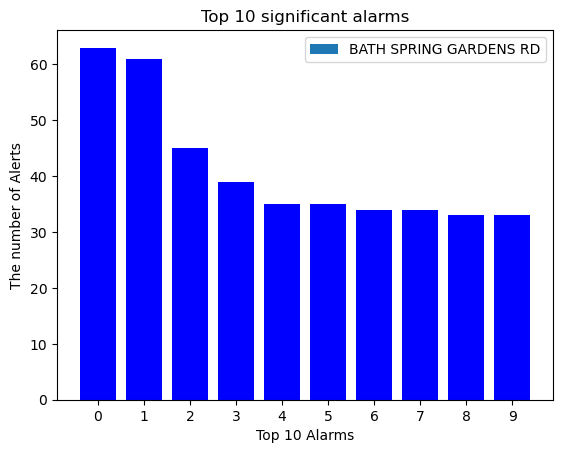

In [11]:
df_10 = df_100.head(10)
color_dict = {'BATH SPRING GARDENS RD': 'b'}
plt.bar(df_10.index,df_10["Alerts_count"], color='b')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Top 10 Alarms')
plt.ylabel('The number of Alerts')
plt.title('Top 10 significant alarms')
plt.bar([], [], color='b', label='BATH SPRING GARDENS RD') # All of the top 10 is 'BATH SPRING GARDENS RD'
plt.legend()
plt.show()

# 3.Summary

1. Only considered "High" Priority because only it relates to events or levels within the overflow structure. And omitted same time and place alerts because they alerted the same observation.

2. In "Description" column, even if the overflow height is the same, the content of "Description" differs depending on the location. Therefore, I considered that the capacity of the sewer varies depending on the location and emphasised notation such as "High" and "Low" rather than the height of the overflow. So, I only considered the words ("High", "Low", and "Normal").

3. Assumed that when an alert occurs within 10 minutes of the previous alert, they are considered to be connected, and if this connected alert happens 10 times continuously, an alarm will sound. Using time variation, Grouped by alarms ID. 

4. Firstly, in the problem, the number of alarms per location was considered the most important factor. Secondly, assuming that the alarms occur through continuous alerts, the number of alerts was deemed the next important factor. Finally, the 'Description' was used as the third criterion for judgment. Based on this approach, the important alarms were determined.

# 4.Additional data

・The data of accuracy of the monitors

The data in which there are instances where the monitors fail to detect an overflow or where they produce false positives will prevent confusion caused by inaccurate data and increase trust in the data. If there is data available from other monitoring methods, I would like to compare it to improve the accuracy of the data.